# DATA PREPROCESSING

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
sns.set()
%matplotlib inline
import re
import string
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Berita Palsu

### Turnbackhoax

In [2]:
turnbackhoax = pd.read_csv('/content/drive/MyDrive/digitalent/data/dataset_turnbackhoax_10k_cleaned.csv')

In [3]:
turnbackhoax.head(5)

,index,Title,Timestamp,FullText,Tags,Author,Url,politik,Narasi,hoax
0,0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-anies...,1,“BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU A...,1
1,1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,"Maret 1, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/03/01/salah-hakim...,0,“ini bener gasih?? Ya Allah gimna keadaan pa h...,1
2,2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-gamba...,1,“Nenek lampir pemimpin partai banteng bercula ...,1
3,3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-jonat...,0,“gerombolan kulup banyak menyusup ke ormas2 is...,1
4,4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,"Februari 28, 2023",Hasil Periksa Fakta Gabriela Nauli Sinaga (Uni...,Fitnah;Hasut;Hoax,Pemeriksa Fakta Junior,https://turnbackhoax.id/2023/02/28/salah-pesan...,1,NaN,1


In [4]:
#check null values
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10384 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10384 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10384 non-null  object
 3   FullText   10382 non-null  object
 4   Tags       10384 non-null  object
 5   Author     10384 non-null  object
 6   Url        10384 non-null  object
 7   politik    10384 non-null  int64 
 8   Narasi     6513 non-null   object
 9   hoax       10384 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 811.4+ KB


In [5]:
#drop null values in title
turnbackhoax.dropna(subset=['Title'], inplace=True)
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     6512 non-null   object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


In [6]:
turnbackhoax['hoax'].unique()
#semua data adalah hoax

array([1])

In [7]:
#remove [SALAH], etc in title
turnbackhoax['Title'] = turnbackhoax['Title'].apply(
    lambda x: re.findall(r'[)\]]\s(.+)', x) if (x[0] == '(') | (x[0] == '[') else x
)
turnbackhoax.info()
turnbackhoax['Title']


<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     6512 non-null   object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


,Title
0,[Anies Baswedan Dekat Dengan Aliran Krsiten Se...
1,[Hakim Wahyu Iman Santoso Alami Kecelakaan Tun...
2,[GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT]
3,[JONATHAN LATUMAHINA SEORANG NASRANI DAN PENYU...
4,[PESAN WHATSAPP DARI BMKG YANG KABARKAN GUNUNG...
...,...
10379,[Foto Raja Salman Mengangkat Tandu Jenazah Kor...
10380,"[Jokowi dituduh bodoh, salah cara dalam bersal..."
10381,[Jokowi dituduh memasukkan ribuan tenaga kerja...
10382,[Mata Uang Rupiah Terpuruk]


In [8]:
turnbackhoax['Narasi'] = turnbackhoax['Narasi'].fillna('')
turnbackhoax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10383 entries, 0 to 10383
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      10383 non-null  int64 
 1   Title      10383 non-null  object
 2   Timestamp  10383 non-null  object
 3   FullText   10381 non-null  object
 4   Tags       10383 non-null  object
 5   Author     10383 non-null  object
 6   Url        10383 non-null  object
 7   politik    10383 non-null  int64 
 8   Narasi     10383 non-null  object
 9   hoax       10383 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 892.3+ KB


In [9]:
#gabungkan "narasi" dengan "judul". yang tidak punya "narasi", tidak dimasukkan

turnbackhoax = turnbackhoax.loc[:, ['Title', 'Narasi', 'hoax']]
turnbackhoax['Narasi'] = turnbackhoax.apply(
    lambda row: str(row["Title"]) + " " + str(row['Narasi']) if row['Narasi'] != '' else row['Narasi'], axis=1
)

turnbackhoax = turnbackhoax.loc[:, ['Narasi', 'hoax']]
turnbackhoax = turnbackhoax[turnbackhoax['Narasi'] != '']
print(turnbackhoax.head(5))

                                              Narasi  hoax
0  ['Anies Baswedan Dekat Dengan Aliran Krsiten S...     1
1  ['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...     1
2  ['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...     1
3  ['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...     1
5  ['PDI-P Diblacklist dari Peserta Pilpres, Tak ...     1


In [10]:
#rename columns
turnbackhoax.columns = ['news', 'is_fake']
turnbackhoax.head()

,news,is_fake
0,['Anies Baswedan Dekat Dengan Aliran Krsiten S...,1
1,['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...,1
2,['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...,1
3,['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...,1
5,"['PDI-P Diblacklist dari Peserta Pilpres, Tak ...",1


### Dataset lain-lain

In [11]:
campur1 = pd.read_csv('/content/drive/MyDrive/digitalent/data/600 news with valid hoax label.csv', encoding='cp1252', sep=";")
campur2 = pd.read_csv('/content/drive/MyDrive/digitalent/data/Data_latih.csv')

campur1['tagging'] = campur1['tagging'].map(lambda x: 0 if x =='Valid' else 1)
campur1.columns = ['news', 'is_fake']
campur2['narasi'] = campur2['judul'] + " " + campur2['narasi']
campur2 = campur2.loc[:,['narasi', 'label']]
campur2.columns = ['news', 'is_fake']

In [12]:
#5k hoax data for training and validation
turnbackhoax_4k = turnbackhoax.sample(n=4000, random_state = 17)
campur_hoax = pd.concat([campur1[campur1['is_fake']==1], campur2[campur2['is_fake']==1]])
campur_hoax_1k = campur_hoax.sample(n=1000, random_state =17)

hoax_data_5k = pd.concat([turnbackhoax_4k, campur_hoax_1k]).reset_index(drop=True)
hoax_data_5k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   news     5000 non-null   object
 1   is_fake  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [13]:
#10k hoax data for testing
hoax_data_10k = pd.concat([turnbackhoax, campur1[campur1['is_fake']==1], campur2[campur2['is_fake']==1]]).reset_index(drop=True)
hoax_data_10k

,news,is_fake
0,['Anies Baswedan Dekat Dengan Aliran Krsiten S...,1
1,['Hakim Wahyu Iman Santoso Alami Kecelakaan Tu...,1
2,['GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT'] “Nen...,1
3,['JONATHAN LATUMAHINA SEORANG NASRANI DAN PENY...,1
4,"['PDI-P Diblacklist dari Peserta Pilpres, Tak ...",1
...,...,...
10200,: KPK Dilarang Membawa Brimob Bersenjata Masuk...,1
10201,Foto pejabat keuangan dibawah palu arit Jangan...,1
10202,Gambar Denny Siregar Musuh Warga Tasikmalaya d...,1
10203,Kaesang: Bapak Saya dengan Kesederhaan Bisa Ni...,1


## Data Berita Asli

### CNN, Kompas, Tempo

In [14]:
!pip install openpyxl
cnn_data = pd.read_excel('/content/drive/MyDrive/digitalent/data/dataset_cnn_10k_cleaned.xlsx')
kompas_data = pd.read_excel('/content/drive/MyDrive/digitalent/data/dataset_kompas_4k_cleaned.xlsx')
tempo_data = pd.read_excel('/content/drive/MyDrive/digitalent/data/dataset_tempo_6k_cleaned.xlsx')
cnn_data.dropna(subset=['text_new'], inplace = True)
kompas_data.dropna(subset=['text_new'], inplace = True)
tempo_data.dropna(subset=['text_new'], inplace = True)

cnn_data.info()
kompas_data.info()
tempo_data.info()

cnn_data = cnn_data[['text_new', 'hoax']]
kompas_data = kompas_data[['text_new', 'hoax']]
tempo_data = tempo_data[['text_new', 'hoax']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9630 entries, 0 to 9629
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  9630 non-null   int64 
 1   Title       9630 non-null   object
 2   Timestamp   9630 non-null   object
 3   FullText    9630 non-null   object
 4   Tags        9627 non-null   object
 5   Author      9630 non-null   object
 6   Url         9630 non-null   object
 7   text_new    9630 non-null   object
 8   hoax        9630 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 677.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 4723 entries, 0 to 4749
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4723 non-null   int64 
 1   Title       4723 non-null   object
 2   Timestamp   4723 non-null   object
 3   FullText    4723 non-null   object
 4   Tags        4586 non-null   object
 5   Author      4413

In [15]:
#rename column
cnn_data.columns = ['news', 'is_fake']
kompas_data.columns = ['news', 'is_fake']
tempo_data.columns = ['news', 'is_fake']

### Dataset Lain-Lain

In [16]:
news_data = pd.concat([cnn_data, kompas_data, tempo_data, campur1[campur1['is_fake']==0], campur2[campur2['is_fake']==0]]).reset_index(drop=True)
news_data

,news,is_fake
0,Anies di Milad BKMT: Pengajian Menghasilkan Ib...,0
1,Edy Soal Pilgub Sumut: Kalau yang Maju Abal-ab...,0
2,PKB Bakal Daftarkan Menaker Ida Fauziyah Jadi ...,0
3,Gede Pasek Doakan AHY Jadi Capres atau Cawapre...,0
4,PKN Siapkan Jabatan Khusus Buat Anas Urbaningr...,0
...,...,...
22078,Apabila Kalian Telah Menangkap PKI yang Pura-P...,0
22079,Rela Berkorban demi Jihad Goban Mikir Loe ?\n ...,0
22080,PIDATO ANIES BASWEDAN DALAM PESTA RAKYAT PELAN...,0
22081,"Menara Masjid Al-Aqsha di Jayapura Ditolak, Be...",0


In [17]:
#5k news_data for traing and validation
news_data_5k = news_data.sample(n=5000, random_state=17)

In [18]:
#10k news_data for testing
news_data_10k = news_data.sample(n=10000, random_state=17)

## Menggabungkan Berita Palsu dan Asli

In [19]:
#10k for training and validation
data_10k = pd.concat([hoax_data_5k, news_data_5k]).reset_index(drop=True)
data_20k = pd.concat([hoax_data_10k, news_data_10k]).reset_index(drop=True)

## Data Cleaning

In [20]:
def clean(text):
  #turn to alphanumeric, convert numeric to <NUMBER>
  text = text.lower()
  text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
  text = re.sub(r'\b\d+\b', '<NUMBER>', text)
  return text

In [21]:
!pip install indoNLP
import indoNLP.preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.4 MB/s eta 0:00:00


In [22]:
# clean_data_20k = data_20k.copy()
# clean_data_20k['news'] = clean_data_20k['news'].apply(clean)
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.remove_html(row))
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.remove_url(row))
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.replace_slang(row))
# clean_data_20k['news'] = clean_data_20k['news'].apply(lambda row: indoNLP.preprocessing.replace_word_elongation(row))

In [23]:
# clean_data_10k = data_10k.copy()
# clean_data_10k['news'] = clean_data_10k['news'].apply(clean)
# clean_data_10k['news'] = clean_data_10k['news'].apply(lambda row: indoNLP.preprocessing.remove_html(row))
# clean_data_10k['news'] = clean_data_10k['news'].apply(lambda row: indoNLP.preprocessing.remove_url(row))
# clean_data_10k['news'] = clean_data_10k['news'].apply(lambda row: indoNLP.preprocessing.replace_slang(row))
# clean_data_10k['news'] = clean_data_10k['news'].apply(lambda row: indoNLP.preprocessing.replace_word_elongation(row))

In [24]:
# clean_data_20k.to_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_20k.csv', index = False)
# clean_data_10k.to_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_10k.csv', index = False)

## Simple EDA

In [25]:
clean_data_20k = pd.read_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_20k.csv')
clean_data_10k = pd.read_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_10k.csv')
clean_data_10k['tokens'] = clean_data_10k['news'].apply(lambda row: len(row.split()))
clean_data_20k['tokens'] = clean_data_20k['news'].apply(lambda row: len(row.split()))

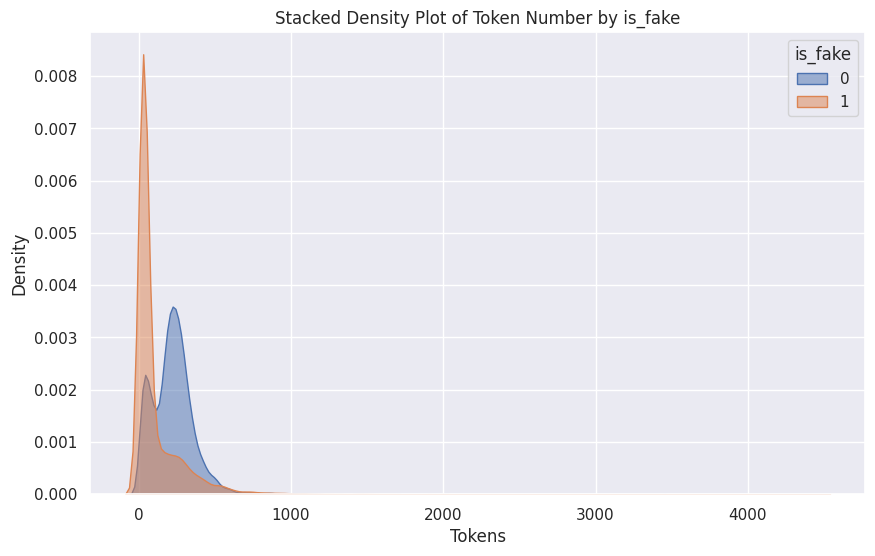

In [26]:
plt.figure(figsize=(10, 6))
for is_fake in [0,1]:
    subset = clean_data_20k[clean_data_20k['is_fake'] == is_fake]
    sns.kdeplot(subset['tokens'], fill=True, label=is_fake, alpha=0.5)

# Add labels and title
plt.xlabel('Tokens')
plt.ylabel('Density')
plt.title('Stacked Density Plot of Token Number by is_fake')

# Show legend and plot
plt.legend(title='is_fake')
plt.show()

Jumlah kata di berita palsu secara rata-rata lebih sedikit daripada jumlah kata di berita asli

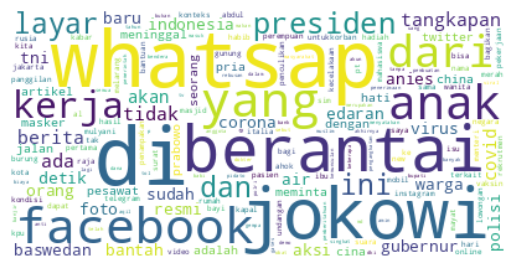

In [32]:
text = " ".join(cat.split()[1] for cat in clean_data_20k[clean_data_20k['is_fake']==1]['news'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

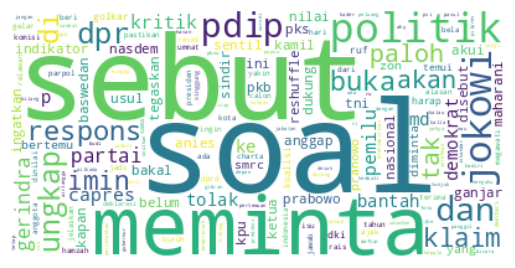

In [33]:
text = " ".join(cat.split()[1] for cat in clean_data_20k[clean_data_20k['is_fake']==0]['news'])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Kata-kata yang sering muncul di berita palsu mengandung "whatsapp", "facebook", dan ada beberapa kata ofensif seperti "cina". Sebaliknya, kata-kata di berita asli yang sering muncul lebih netral dan tidak mengandung kata-kata ofensif.

## Get Testing Data

In [27]:
val_10k = ''
clean_data_10k = pd.read_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_10k.csv')
clean_data_20k = pd.read_csv('/content/drive/MyDrive/digitalent/data/clean/elongated_word_20k.csv')

val_10k = clean_data_20k.merge(clean_data_10k[['news']], on='news', how='left', indicator=True)
val_10k = val_10k[val_10k['_merge'] == 'left_only'].drop(columns=['_merge'])
val_10k = val_10k.sample(n=10000, random_state=17).reset_index(drop=True)
val_10k

#val_10k.to_csv('/content/drive/MyDrive/digitalent/data/clean/val_10k.csv')

,news,is_fake,tokens
0,foto wapres sama ruf dengan narasi dirinya dia...,1,32
1,sms hadiah rp100 juta dari pt len industri ...,1,35
2,alasan ppatk meminta tambah anggaran rp63 mili...,0,233
3,informasi terjadinya perampokan di perumahan p...,1,69
4,partai golkar akan umumkan bergabungnya ridwan...,0,167
...,...,...,...
9995,akun facebook bupati tegal hajjah umi azizah a...,1,14
9996,video gempa cianjur pray for cianjur,1,11
9997,video detik detik lahirnya anak kembar wo...,1,237
9998,beredar risalah rapat pengangkatan nama nama...,1,39
